In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [5]:
assert hasattr(tf, 'function')

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
targets = targets[:10000]
images = images[:10000]

#print(images.shape)
print(targets.shape)

#print(images[0])

(10000,)


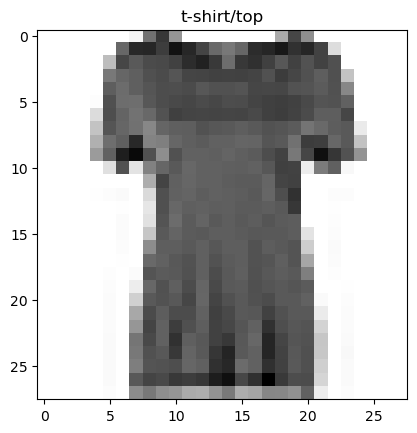

In [11]:
targets_names = ["t-shirt/top", "Trouser", "Pullover", 'Dress', "Coat", "Sandal", "Shirt", "Sneaker",
                 "Bag", "Ankle boot"]
plt.imshow(images[10], cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

In [13]:
#Création de model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

print("shape of the image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("shape of the image after the fatten", model_output.shape)
plt.show()

shape of the image (1, 28, 28)
1/1 [==============================] - 0s 36ms/step
shape of the image after the fatten (1, 784)


# Ajout de Layers

In [14]:
#Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

#Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])
plt.show()

1/1 [==============================] - 0s 87ms/step
[[0.0000000e+00 2.0505858e-28 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]] [9]


# Résumer de model

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# Compilation de model

In [16]:
model.compile(
loss='sparse_categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy']
)

# Entrainement de model

In [17]:
history = model.fit(images, targets, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 2625407476039680.0000 - accuracy: 0.0985
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3025 - accuracy: 0.0987
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3025 - accuracy: 0.1005
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.0994
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1025
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1020
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1014
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.0955
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0963
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - a

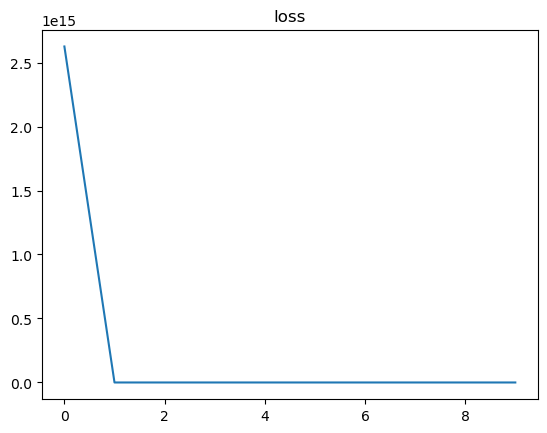

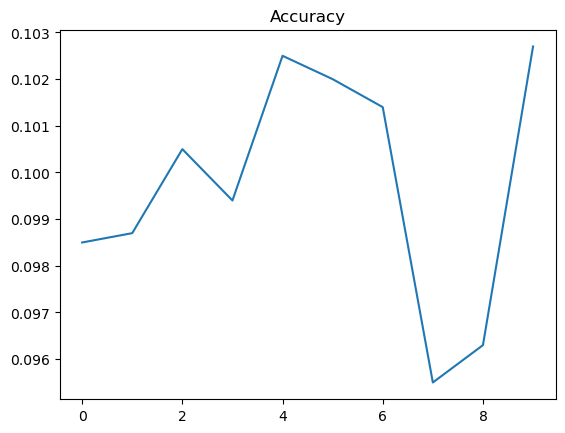

In [18]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()